#Visualizing and analyzing the data

##Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:
data = pd.read_csv('/content/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


##Uni-variate analysis

<ipython-input-3-cb1e16043a3f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='r')
<ipython-input-3-cb1e16043a3f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


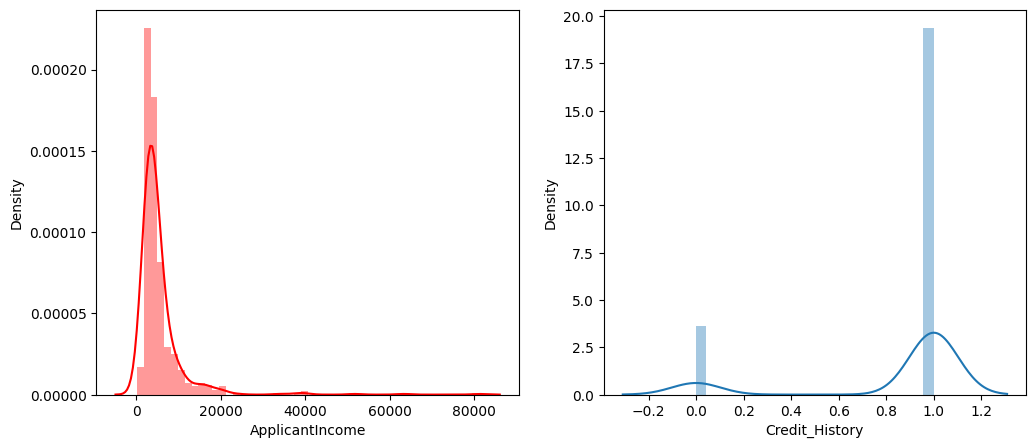

In [3]:
# Plotting the figure
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')

plt.subplot(122)
sns.distplot(data['Credit_History'])

plt.show()

##Bivariate analysis

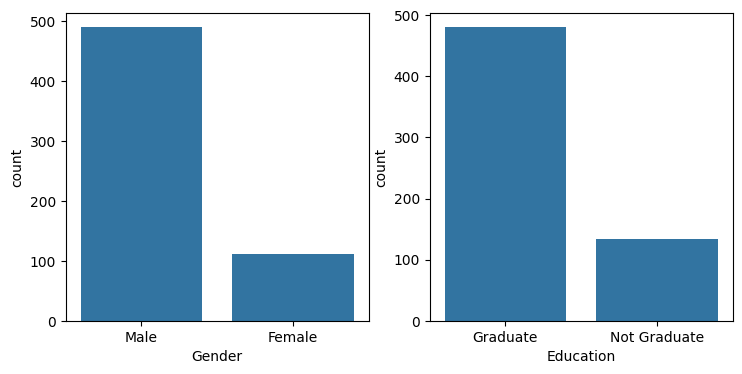

In [4]:
# Plotting the count plot
plt.figure(figsize=(18, 4))

plt.subplot(1, 4, 1)
sns.countplot(x=data['Gender'])

plt.subplot(1, 4, 2)
sns.countplot(x=data['Education'])

plt.show()

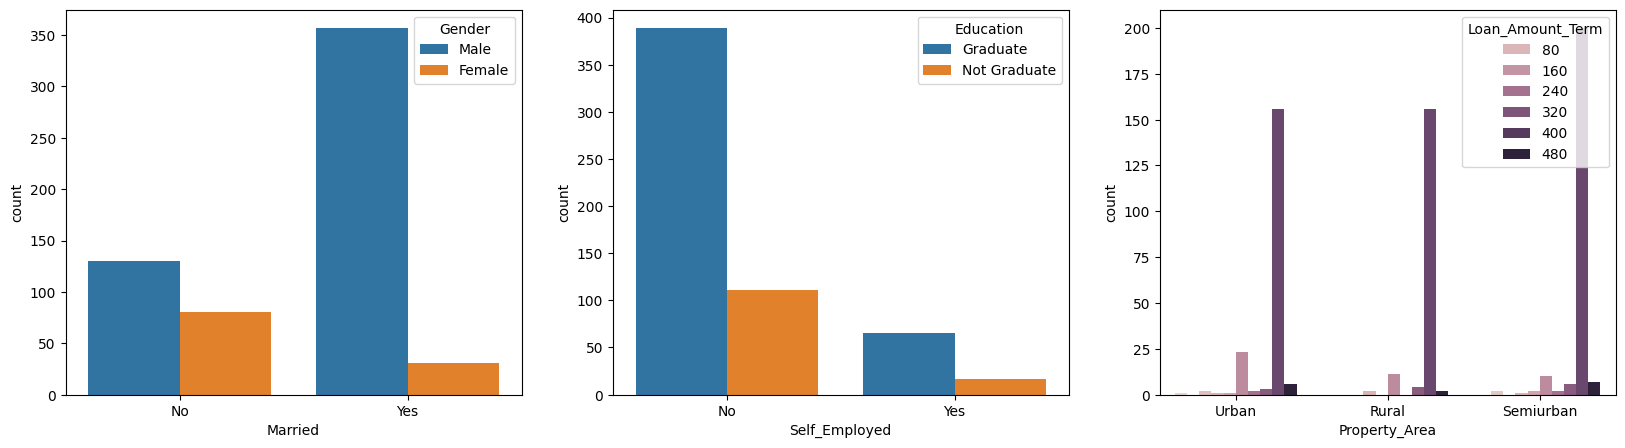

In [5]:
# Plotting count plots with subplots
plt.figure(figsize=(20, 5))

plt.subplot(131)
sns.countplot(x=data['Married'], hue=data['Gender'])

plt.subplot(132)
sns.countplot(x=data['Self_Employed'], hue=data['Education'])

plt.subplot(133)
sns.countplot(x=data['Property_Area'], hue=data['Loan_Amount_Term'])

plt.show()

##Multivariate analysis

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


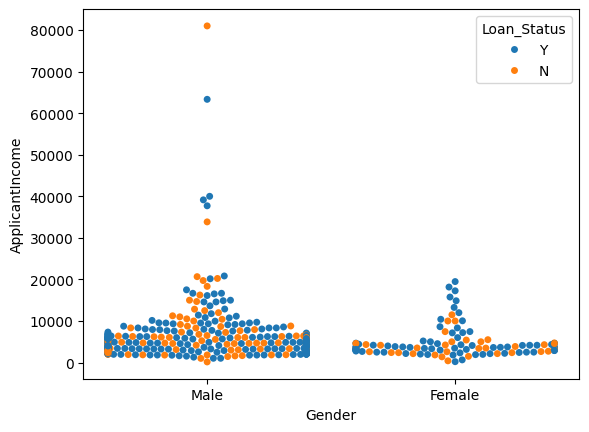

In [6]:
sns.swarmplot(x='Gender',y='ApplicantIncome',hue='Loan_Status',data=data)

##Descriptive analysis

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#Data Pre-processing

##Checking for null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [10]:
# Filling missing values
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].str.replace(' ', '')
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())


In [ ]:
#data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean()).astype('int64')
#data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean()).astype('int64')
#data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean()).astype('int64')

##Handling Categorical Values

In [11]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})
data['Property_Area']=data['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})
data['Married']=data['Married'].map({'Yes':1,'No':0})
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})
data['Dependents']=data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [12]:
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

##Balancing the dataset

In [13]:
from enum import auto
from imblearn.combine import SMOTETomek
smote = SMOTETomek(sampling_strategy='auto')

X = data.drop(columns=['Loan_Status','Loan_ID'], axis=1)
y = data['Loan_Status']

X_bal, y_bal = smote.fit_resample(X, y)

print("Before balancing:")
print(y.value_counts())

print("\nAfter balancing:")
print(y_bal.value_counts())

Before balancing:
Loan_Status
1    422
0    192
Name: count, dtype: int64

After balancing:
Loan_Status
1    359
0    359
Name: count, dtype: int64


##Scaling the Data

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_bal = sc.fit_transform(X_bal)
X_bal = pd.DataFrame(X_bal, columns=X.columns)

In [15]:
X_bal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.552679,-1.157049,-0.697003,0.645115,-0.315501,0.115260,-0.532097,-0.198606,0.268167,0.632147,1.396908
1,0.552679,0.864268,-0.697003,0.645115,3.169567,-0.379728,-0.532097,-1.008458,0.268167,0.632147,1.396908
2,0.552679,0.864268,-0.697003,-1.550111,-0.315501,-0.452178,0.263932,-0.303103,0.268167,0.632147,1.396908
3,0.552679,-1.157049,-0.697003,0.645115,-0.315501,0.141495,-0.532097,-0.028799,0.268167,0.632147,1.396908
4,0.552679,0.864268,1.419056,0.645115,3.169567,0.040204,0.884416,1.617029,0.268167,0.632147,1.396908


In [16]:
z = data.drop(columns=['Loan_ID'],axis=1)

In [18]:
# Calculate correlation matrix
correlation_matrix = z.corr()
print(correlation_matrix['Loan_Status'].sort_values(ascending=False))

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Education            0.085884
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059188
Name: Loan_Status, dtype: float64


##Splitting data into train and test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

#Model Building

##Decision tree model

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def decisionTree(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print("**Decision Tree Classifier**")
    print("Confusion matrix")
    print(confusion_matrix(y_test, y_pred))
    print("Classification report")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

In [21]:
decisionTree(X_train, X_test, y_train, y_test)

**Decision Tree Classifier**
Confusion matrix
[[54 20]
 [13 57]]
Classification report
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        74
           1       0.74      0.81      0.78        70

    accuracy                           0.77       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.77      0.77      0.77       144

Accuracy Score: 0.7708333333333334


##Random forest model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def randomforest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print("*** Random Forest Classifier ***")
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

In [23]:
randomforest(X_train, X_test, y_train, y_test)

*** Random Forest Classifier ***
Confusion matrix:
[[54 20]
 [ 5 65]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        74
           1       0.76      0.93      0.84        70

    accuracy                           0.83       144
   macro avg       0.84      0.83      0.83       144
weighted avg       0.84      0.83      0.82       144

Accuracy Score: 0.8263888888888888


##KNN model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def KNN(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("*** KNeighbors Classifier ***")
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

In [25]:
KNN(X_train, X_test, y_train, y_test)

*** KNeighbors Classifier ***
Confusion matrix:
[[45 29]
 [ 7 63]]
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.61      0.71        74
           1       0.68      0.90      0.78        70

    accuracy                           0.75       144
   macro avg       0.78      0.75      0.75       144
weighted avg       0.78      0.75      0.75       144

Accuracy Score: 0.75


##Gradient boost model

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def gradientboost(X_train, X_test, y_train, y_test):
    gb = GradientBoostingClassifier()
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print("*** Gradient Boosting Classifier ***")
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

In [27]:
gradientboost(X_train, X_test, y_train, y_test)

*** Gradient Boosting Classifier ***
Confusion matrix:
[[44 30]
 [ 5 65]]
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.59      0.72        74
           1       0.68      0.93      0.79        70

    accuracy                           0.76       144
   macro avg       0.79      0.76      0.75       144
weighted avg       0.79      0.76      0.75       144

Accuracy Score: 0.7569444444444444


##Comparing the models

In [28]:
df = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()

In [29]:
df.fit(X_train,y_train)
rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
pred1=df.predict(X_train)
pred2=rf.predict(X_train)
pred3=knn.predict(X_train)
pred4=gb.predict(X_train)

In [30]:
print('Decision Tree:',accuracy_score(y_train,pred1))
print('Random Forest:',accuracy_score(y_train,pred2))
print('KNN:',accuracy_score(y_train,pred3))
print('XGBoost:',accuracy_score(y_train,pred4))

Decision Tree: 1.0
Random Forest: 1.0
KNN: 0.8344947735191638
XGBoost: 0.921602787456446


In [31]:
y_pred1=df.predict(X_test)
y_pred2=rf.predict(X_test)
y_pred3=knn.predict(X_test)
y_pred4=gb.predict(X_test)

In [32]:
print('Decision Tree:',accuracy_score(y_test,y_pred1))
print('Random Forest:',accuracy_score(y_test,y_pred2))
print('KNN:',accuracy_score(y_test,y_pred3))
print('XGBoost:',accuracy_score(y_test,y_pred4))

Decision Tree: 0.7430555555555556
Random Forest: 0.8125
KNN: 0.75
XGBoost: 0.7569444444444444


In [33]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
rfe = RFE(estimator=dt, n_features_to_select=7)

rfe.fit(X_train, y_train)

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]

dt.fit(X_train_rfe, y_train)

y_pred = dt.predict(X_test_rfe)

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.77


In [34]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
rfe = RFE(estimator=rf, n_features_to_select=7)

rfe.fit(X_train, y_train)

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]

rf.fit(X_train_rfe, y_train)

y_pred = rf.predict(X_test_rfe)

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.83


In [37]:
model = RandomForestClassifier(verbose=2,n_estimators=120,max_features='log2',max_depth=10,criterion='entropy')
model.fit(X_train, y_train)

building tree 1 of 120
building tree 2 of 120
building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120
building tree 40 of 120
building tree 41 of 120
building tree 42 of 120
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s


building tree 51 of 120
building tree 52 of 120
building tree 53 of 120
building tree 54 of 120
building tree 55 of 120
building tree 56 of 120
building tree 57 of 120
building tree 58 of 120
building tree 59 of 120
building tree 60 of 120
building tree 61 of 120
building tree 62 of 120
building tree 63 of 120
building tree 64 of 120
building tree 65 of 120
building tree 66 of 120
building tree 67 of 120
building tree 68 of 120
building tree 69 of 120
building tree 70 of 120
building tree 71 of 120
building tree 72 of 120
building tree 73 of 120
building tree 74 of 120
building tree 75 of 120
building tree 76 of 120
building tree 77 of 120
building tree 78 of 120
building tree 79 of 120
building tree 80 of 120
building tree 81 of 120
building tree 82 of 120
building tree 83 of 120
building tree 84 of 120
building tree 85 of 120
building tree 86 of 120
building tree 87 of 120
building tree 88 of 120
building tree 89 of 120
building tree 90 of 120
building tree 91 of 120
building tree 92

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=120, verbose=2)

In [39]:
pickle.dump(model,open('loan_prediction_approve.pkl','wb'))

In [40]:
pickle.dump(sc,open('scaling.pkl','wb'))

In [38]:
input=[[0.552679,0.864268,1.419056,0.645115,3.169567,0.040204,0.884416,1.617029,0.268167,0.632147,1.396908]]
input=sc.transform(input)
prediction = model.predict(input)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


array([1])